In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde, skew, kurtosis, shapiro
from scipy.stats import chi2_contingency


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
cols = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
        "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
        "hours-per-week", "native-country", "income"]
df = pd.read_csv(url, names=cols)


In [3]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
df.replace(' ?',np.nan,inplace=True) 

In [9]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [10]:
# nan values in percentage with respect to each columns :
for feature in df.columns :
    print(feature ,np.round((df[feature].isnull().mean()*100),4))

age 0.0
workclass 5.6386
fnlwgt 0.0
education 0.0
education-num 0.0
marital-status 0.0
occupation 5.6601
relationship 0.0
race 0.0
sex 0.0
capital-gain 0.0
capital-loss 0.0
hours-per-week 0.0
native-country 1.7905
income 0.0


In [11]:
df[df.duplicated()]
df.drop_duplicates(inplace=True)


In [13]:
# list all categorical variable 
categorical_variables = df.select_dtypes(include='object').columns.tolist()

In [14]:
categorical_variables

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

# univariable analysis 

1)for categorical_variables

In [15]:
workclass_value_counts = df['workclass'].value_counts()
print(workclass_value_counts)


 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


In [16]:
for variable in categorical_variables:
    value_counts = df[variable].value_counts(normalize=True) * 100
    print(f"The relative frequencies in the '{variable}' variable with respect to all categories in percentage are as follows:\n")
    print(value_counts)
    print('='*100)
    print("\n")


The relative frequencies in the 'workclass' variable with respect to all categories in percentage are as follows:

 Private             73.851015
 Self-emp-not-inc     8.273346
 Local-gov            6.817368
 State-gov            4.227875
 Self-emp-inc         3.635061
 Federal-gov          3.126934
 Without-pay          0.045601
 Never-worked         0.022801
Name: workclass, dtype: float64


The relative frequencies in the 'education' variable with respect to all categories in percentage are as follows:

 HS-grad         32.252513
 Some-college    22.380674
 Bachelors       16.452039
 Masters          5.292436
 Assoc-voc        4.247472
 11th             3.611273
 Assoc-acdm       3.279344
 10th             2.867505
 7th-8th          1.982359
 Prof-school      1.770292
 9th              1.579740
 12th             1.330793
 Doctorate        1.269324
 5th-6th          1.020377
 1st-4th          0.510188
 Preschool        0.153671
Name: education, dtype: float64


The relative frequenci

The relative frequencies in the 'workclass' variable with respect to all categories in percentage are as follows:

 Private             73.851015
 Self-emp-not-inc     8.273346
 Local-gov            6.817368
 State-gov            4.227875
 Self-emp-inc         3.635061
 Federal-gov          3.126934
 Without-pay          0.045601
 Never-worked         0.022801
Name: workclass, dtype: float64




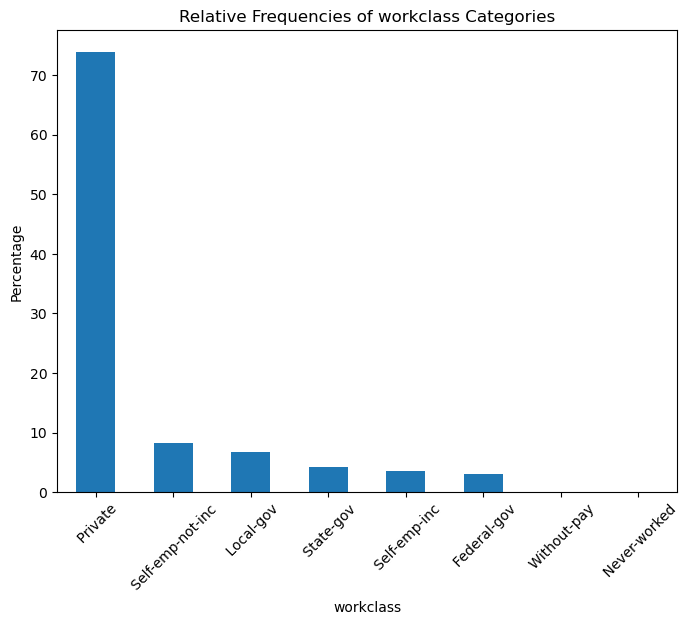

Analysis of workclass:

The 'workclass' variable exhibits the following patterns:

- The category with the highest relative frequency is ' Private' with 73.85%.
- The category with the lowest relative frequency is ' Never-worked' with 0.02%.
- There are a total of 8 unique categories in the 'workclass' variable.


The relative frequencies in the 'education' variable with respect to all categories in percentage are as follows:

 HS-grad         32.252513
 Some-college    22.380674
 Bachelors       16.452039
 Masters          5.292436
 Assoc-voc        4.247472
 11th             3.611273
 Assoc-acdm       3.279344
 10th             2.867505
 7th-8th          1.982359
 Prof-school      1.770292
 9th              1.579740
 12th             1.330793
 Doctorate        1.269324
 5th-6th          1.020377
 1st-4th          0.510188
 Preschool        0.153671
Name: education, dtype: float64




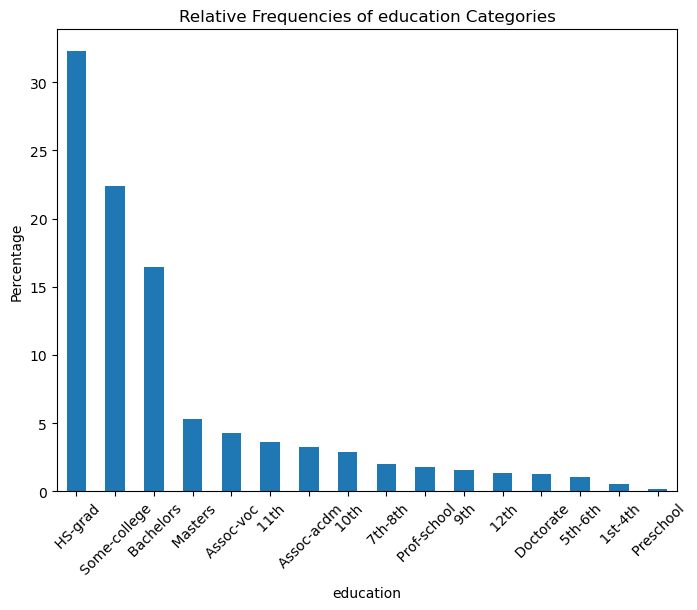

Analysis of education:

The 'education' variable exhibits the following patterns:

- The category with the highest relative frequency is ' HS-grad' with 32.25%.
- The category with the lowest relative frequency is ' Preschool' with 0.15%.
- There are a total of 16 unique categories in the 'education' variable.


The relative frequencies in the 'marital-status' variable with respect to all categories in percentage are as follows:

 Married-civ-spouse       46.009159
 Never-married            32.784215
 Divorced                 13.649076
 Separated                 3.150260
 Widowed                   3.051910
 Married-spouse-absent     1.284691
 Married-AF-spouse         0.070689
Name: marital-status, dtype: float64




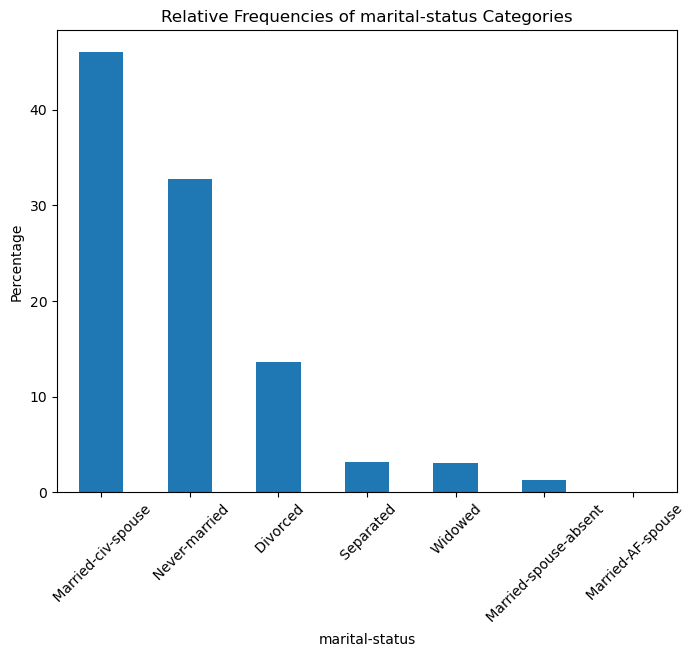

Analysis of marital-status:

The 'marital-status' variable exhibits the following patterns:

- The category with the highest relative frequency is ' Married-civ-spouse' with 46.01%.
- The category with the lowest relative frequency is ' Married-AF-spouse' with 0.07%.
- There are a total of 7 unique categories in the 'marital-status' variable.


The relative frequencies in the 'occupation' variable with respect to all categories in percentage are as follows:

 Prof-specialty       13.474946
 Craft-repair         13.338112
 Exec-managerial      13.243631
 Adm-clerical         12.276015
 Sales                11.891575
 Other-service        10.721965
 Machine-op-inspct     6.515931
 Transport-moving      5.202971
 Handlers-cleaners     4.460155
 Farming-fishing       3.231902
 Tech-support          3.020134
 Protective-serv       2.114420
 Priv-house-serv       0.478921
 Armed-Forces          0.029322
Name: occupation, dtype: float64




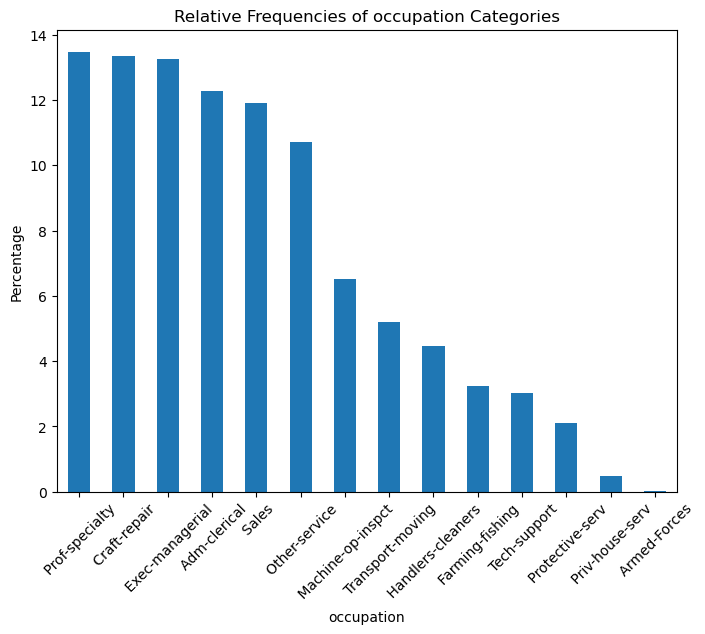

Analysis of occupation:

The 'occupation' variable exhibits the following patterns:

- The category with the highest relative frequency is ' Prof-specialty' with 13.47%.
- The category with the lowest relative frequency is ' Armed-Forces' with 0.03%.
- There are a total of 14 unique categories in the 'occupation' variable.


The relative frequencies in the 'relationship' variable with respect to all categories in percentage are as follows:

 Husband           40.529244
 Not-in-family     25.484833
 Own-child         15.563820
 Unmarried         10.587946
 Wife               4.819129
 Other-relative     3.015029
Name: relationship, dtype: float64




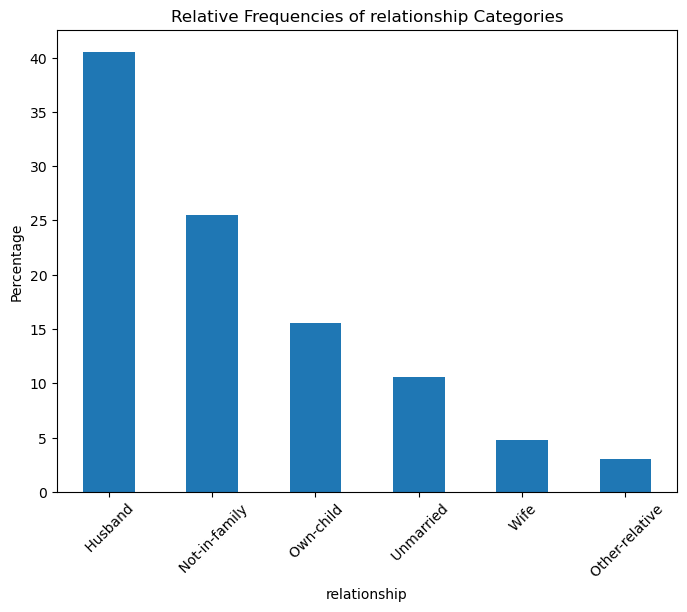

Analysis of relationship:

The 'relationship' variable exhibits the following patterns:

- The category with the highest relative frequency is ' Husband' with 40.53%.
- The category with the lowest relative frequency is ' Other-relative' with 3.02%.
- There are a total of 6 unique categories in the 'relationship' variable.


The relative frequencies in the 'race' variable with respect to all categories in percentage are as follows:

 White                 85.425823
 Black                  9.595230
 Asian-Pac-Islander     3.190214
 Amer-Indian-Eskimo     0.955835
 Other                  0.832898
Name: race, dtype: float64




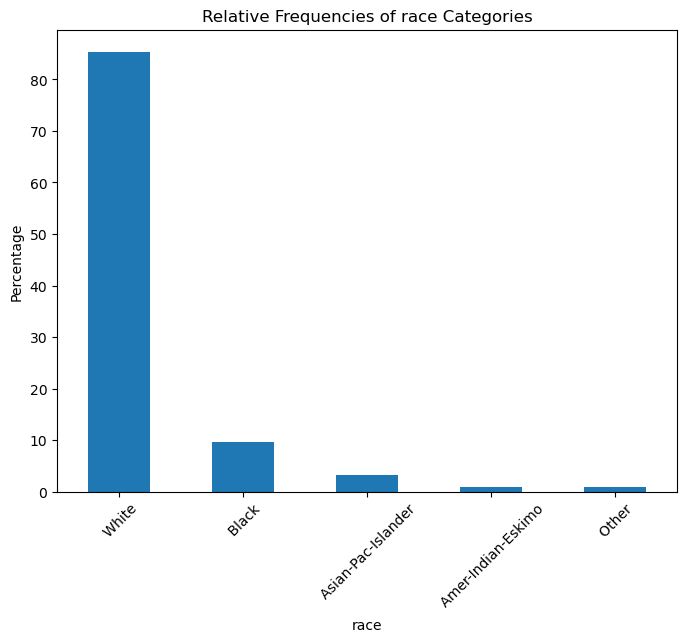

Analysis of race:

The 'race' variable exhibits the following patterns:

- The category with the highest relative frequency is ' White' with 85.43%.
- The category with the lowest relative frequency is ' Other' with 0.83%.
- There are a total of 5 unique categories in the 'race' variable.


The relative frequencies in the 'sex' variable with respect to all categories in percentage are as follows:

 Male      66.92381
 Female    33.07619
Name: sex, dtype: float64




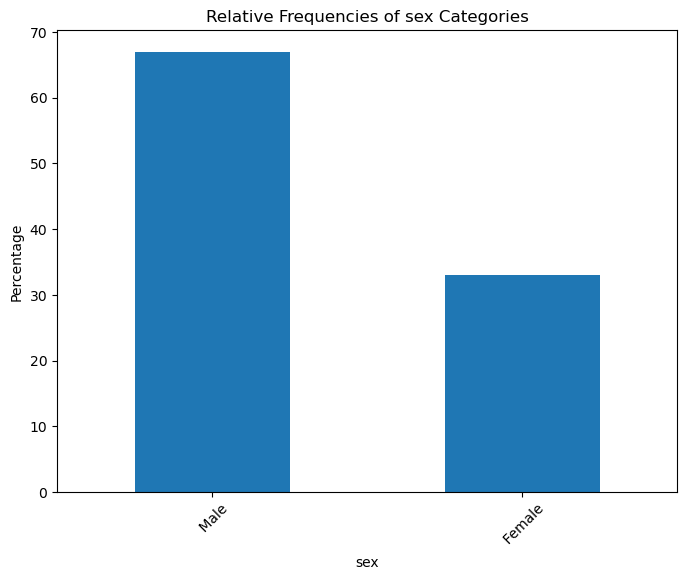

Analysis of sex:

The 'sex' variable exhibits the following patterns:

- The category with the highest relative frequency is ' Male' with 66.92%.
- The category with the lowest relative frequency is ' Female' with 33.08%.
- There are a total of 2 unique categories in the 'sex' variable.


The relative frequencies in the 'native-country' variable with respect to all categories in percentage are as follows:

 United-States                 91.231419
 Mexico                         1.999687
 Philippines                    0.619621
 Germany                        0.428728
 Canada                         0.378657
 Puerto-Rico                    0.356752
 El-Salvador                    0.331716
 India                          0.312940
 Cuba                           0.297293
 England                        0.281646
 Jamaica                        0.253481
 South                          0.250352
 China                          0.234705
 Italy                          0.228446
 Dominican-Repub

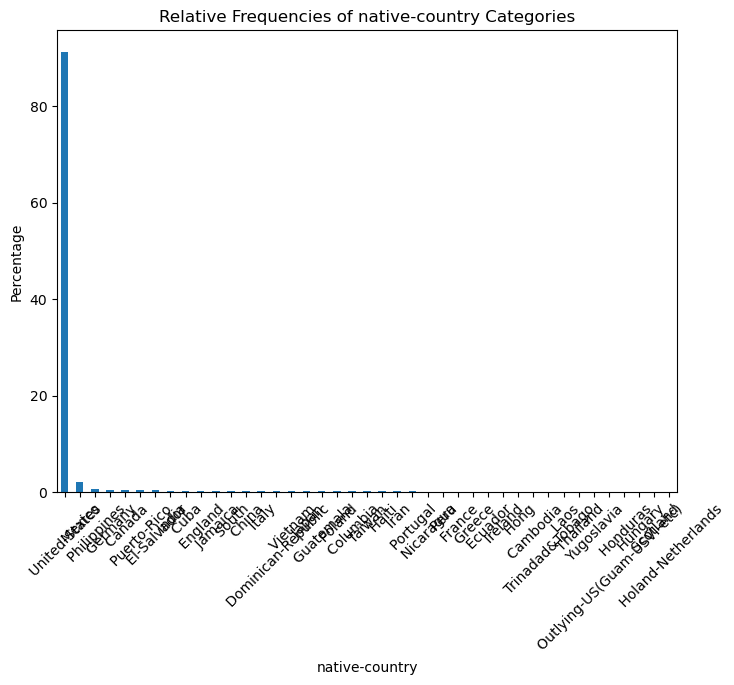

Analysis of native-country:

The 'native-country' variable exhibits the following patterns:

- The category with the highest relative frequency is ' United-States' with 91.23%.
- The category with the lowest relative frequency is ' Holand-Netherlands' with 0.00%.
- There are a total of 41 unique categories in the 'native-country' variable.


The relative frequencies in the 'income' variable with respect to all categories in percentage are as follows:

 <=50K    75.907428
 >50K     24.092572
Name: income, dtype: float64




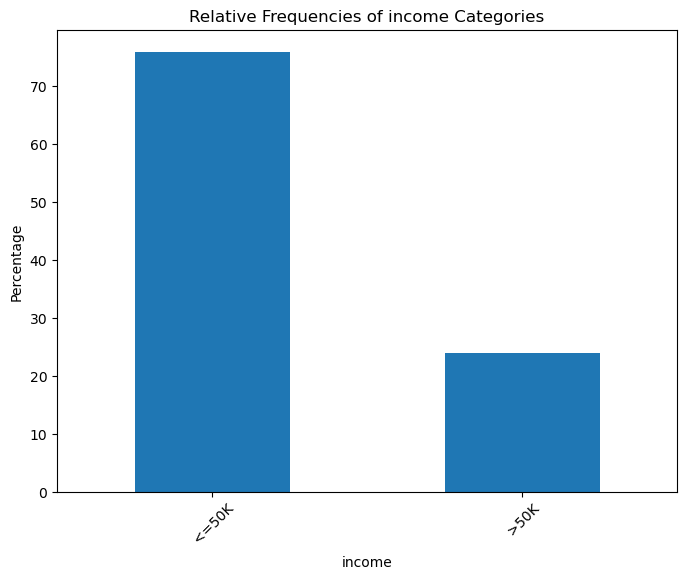

Analysis of income:

The 'income' variable exhibits the following patterns:

- The category with the highest relative frequency is ' <=50K' with 75.91%.
- The category with the lowest relative frequency is ' >50K' with 24.09%.
- There are a total of 2 unique categories in the 'income' variable.




In [17]:
import matplotlib.pyplot as plt

for variable in categorical_variables:
    value_counts = df[variable].value_counts(normalize=True) * 100
    print('='*100)
    print(f"The relative frequencies in the '{variable}' variable with respect to all categories in percentage are as follows:\n")
    print(value_counts)
    print("\n")
    
    plt.figure(figsize=(8, 6))
    value_counts.plot(kind='bar')
    plt.xlabel(variable)
    plt.ylabel('Percentage')
    plt.title(f'Relative Frequencies of {variable} Categories')
    plt.xticks(rotation=45)
    plt.show()
    
    print(f"Analysis of {variable}:\n")
    print(f"The '{variable}' variable exhibits the following patterns:\n")
    print(f"- The category with the highest relative frequency is '{value_counts.idxmax()}' with {value_counts.max():.2f}%.")
    print(f"- The category with the lowest relative frequency is '{value_counts.idxmin()}' with {value_counts.min():.2f}%.")
    print(f"- There are a total of {len(value_counts)} unique categories in the '{variable}' variable.")
    print("\n")
    print('='*100)

**Important Note:** The relative frequencies of the 'income' variable across all categories, expressed in percentages, are as follows:

- <=50K: 75.91%
- >50K: 24.09%

This information indicates that the given dataset is imbalanced, as the majority of instances (75.91%) fall under the category of <=50K, while a smaller proportion (24.09%) falls under the category of >50K.
------------------------------------------------------------------------------------------------------------------------------------------------------

In [18]:
numerical_variables = df.select_dtypes(include=[float, int]).columns.tolist() = df.select_dtypes(include=[float, int]).columns.tolist()

In [19]:
numerical_variables 

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

### 2) univariable analysis for numerical_variables

Variable: age


Summary Statistics:
count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64



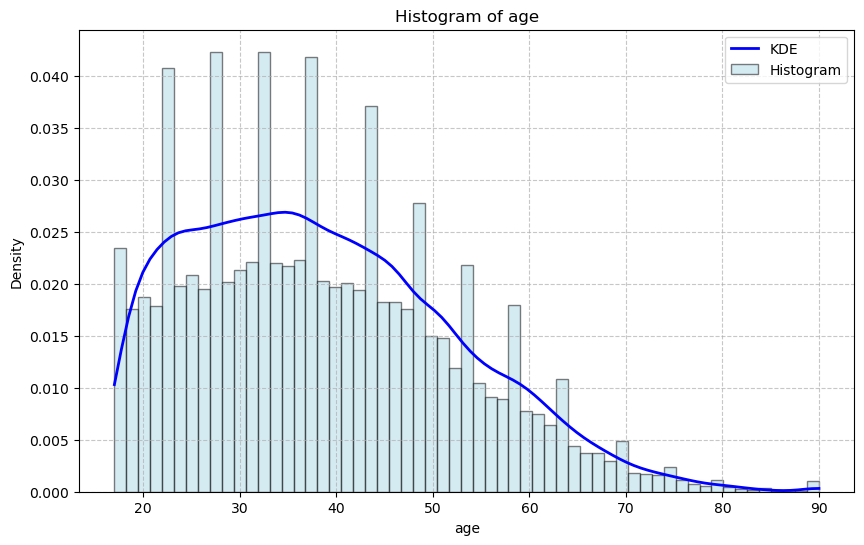

C:\Users\Harshali\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")




Observations:
The distribution of age is positively skewed.


Additional Observations:
The distribution has lighter tails than a normal distribution.

Variable: fnlwgt


Summary Statistics:
count    3.253700e+04
mean     1.897808e+05
std      1.055565e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.369930e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64



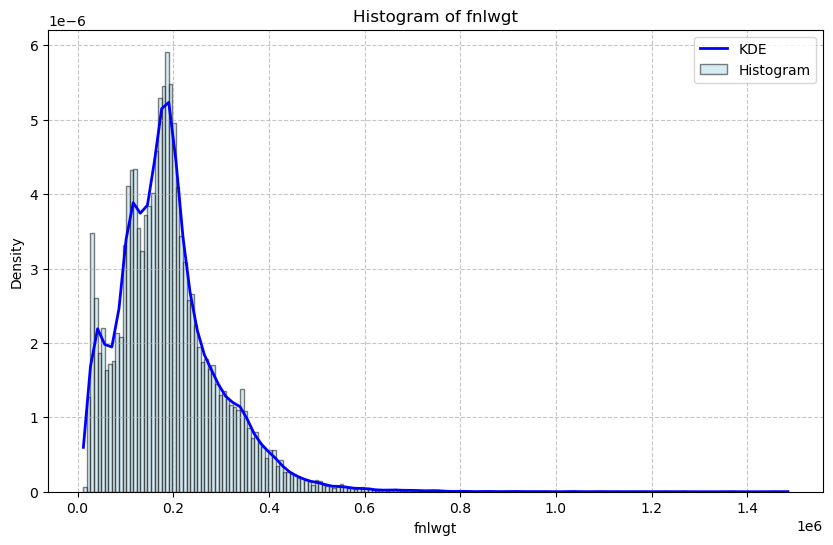

C:\Users\Harshali\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")




Observations:
The distribution of fnlwgt is positively skewed.


Additional Observations:
The distribution has heavier tails than a normal distribution.

Variable: education-num


Summary Statistics:
count    32537.000000
mean        10.081815
std          2.571633
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64



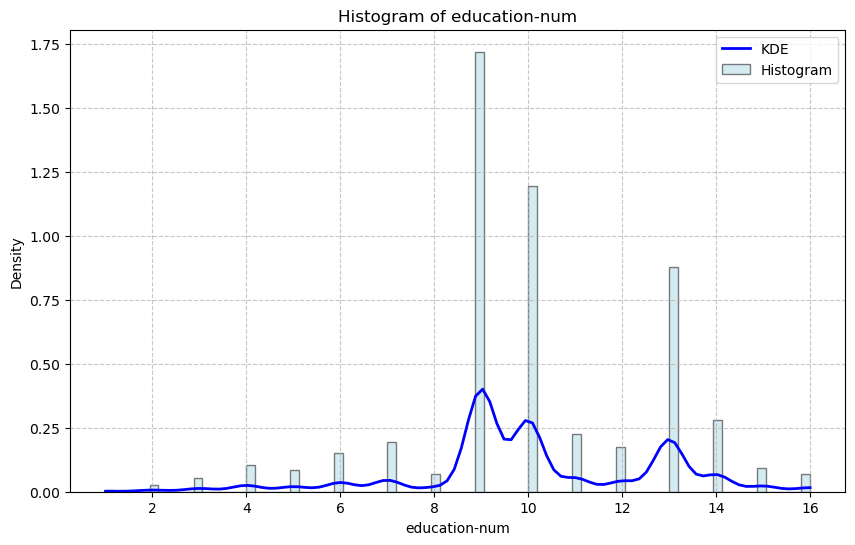

C:\Users\Harshali\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")




Observations:
The distribution of education-num is negatively skewed.


Additional Observations:
The distribution has lighter tails than a normal distribution.

Variable: capital-gain


Summary Statistics:
count    32537.000000
mean      1078.443741
std       7387.957424
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64



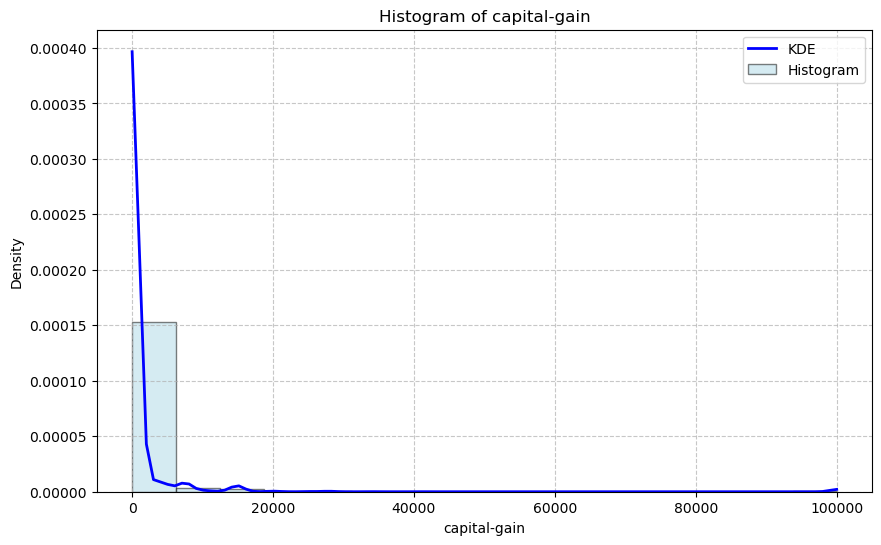

C:\Users\Harshali\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")




Observations:
The distribution of capital-gain is positively skewed.


Additional Observations:
The distribution has heavier tails than a normal distribution.

Variable: capital-loss


Summary Statistics:
count    32537.000000
mean        87.368227
std        403.101833
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64



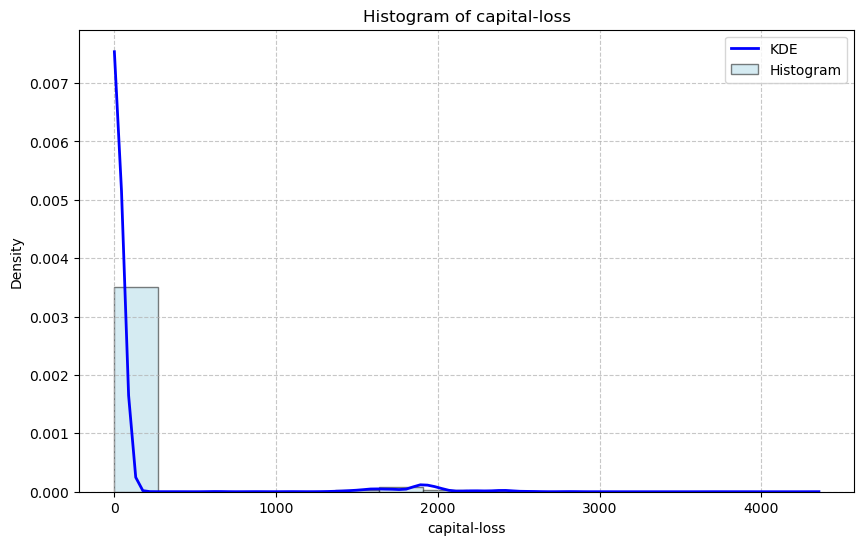

C:\Users\Harshali\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")




Observations:
The distribution of capital-loss is positively skewed.


Additional Observations:
The distribution has heavier tails than a normal distribution.

Variable: hours-per-week


Summary Statistics:
count    32537.000000
mean        40.440329
std         12.346889
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64



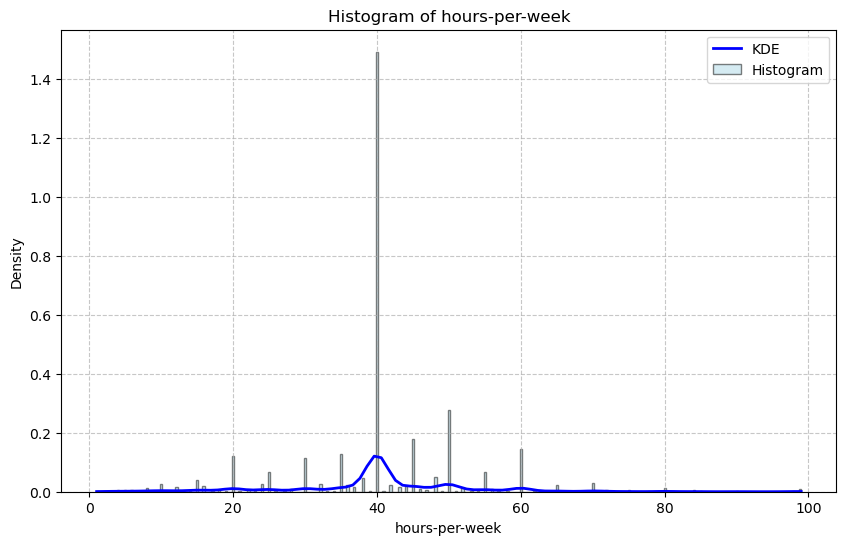



Observations:
The distribution of hours-per-week is positively skewed.


Additional Observations:
The distribution has lighter tails than a normal distribution.



C:\Users\Harshali\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [20]:
for variable in numerical_variables:
    print("Variable:", variable)
    print("\n")
    print("Summary Statistics:")
    print(df[variable].describe())
    print()

    # Plot histogram and KDE
    plt.figure(figsize=(10, 6))

    # Histogram
    plt.hist(df[variable], bins='auto', density=True, alpha=0.5, color='lightblue', edgecolor='k')

    # KDE
    data = df[variable]
    density = gaussian_kde(data)
    x = np.linspace(data.min(), data.max(), 100)
    plt.plot(x, density(x), color='blue', lw=2)

    # Plot settings
    plt.title(f"Histogram of {variable}")
    plt.xlabel(variable)
    plt.ylabel("Density")
    plt.legend(['KDE', 'Histogram'])
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Distribution Type Checking
    is_normal = shapiro(df[variable])[1] >= 0.05
    is_log_normal = shapiro(np.log1p(df[variable]))[1] >= 0.05
    is_skewed = abs(skew(df[variable])) > 0.5
    is_positively_skewed = skew(df[variable]) > 0
    is_negatively_skewed = skew(df[variable]) < 0

    # Observations
    print("\n")
    print("Observations:")
    
    if is_normal:
        print("The distribution of", variable, "is approximately normal.")
    elif is_log_normal:
        print("The distribution of", variable, "is approximately log-normal.")
    elif is_positively_skewed:
        print("The distribution of", variable, "is positively skewed.")
    elif is_negatively_skewed:
        print("The distribution of", variable, "is negatively skewed.")
    else:
        print("The distribution of", variable, "is not easily classified.")
        
    print("\n")
    print("Additional Observations:")
    if kurtosis(df[variable]) > 3:
        print("The distribution has heavier tails than a normal distribution.")
    else:
        print("The distribution has lighter tails than a normal distribution.")

    print()
    print('='*100)

In [21]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [22]:
# Create a mapping dictionary
income_mapping = {' <=50K': 0, ' >50K': 1}

# Map the values of 'income' column using the mapping dictionary
df['income'] = df['income'].map(income_mapping)


In [23]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


# Bivariate Analysis

### 1)What is the relationship between age and income?

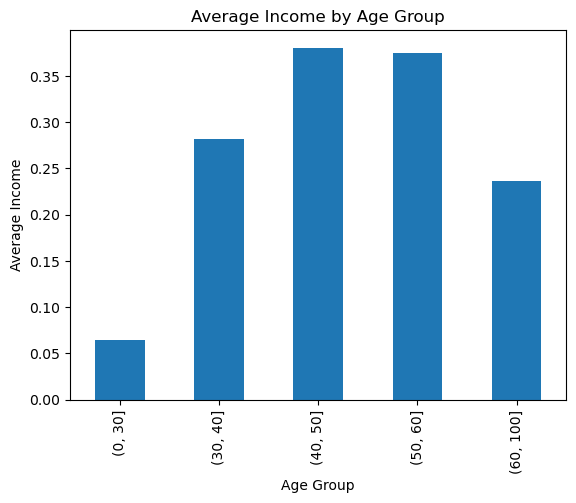

In [24]:
import matplotlib.pyplot as plt

income_by_age = df.groupby(pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 100]))['income'].mean()
income_by_age.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.title('Average Income by Age Group')
plt.show()


## Analysis of Average Income by Age Group

The bar plot above represents the average income by age group. The x-axis represents different age groups, while the y-axis represents the average income.

### Observations:


- The '40-50' and '50-60' age groups have similar average incomes. 
- The youngest age group, '0-30', has the lowest average income.

### Conclusion:

Based on the analysis of average income by age group, it can be observed that there is a general increasing trend in income as age progresses, with higher income levels in older age groups. 

### 2)Does the education level affect the income of individuals?

<Axes: xlabel='education'>

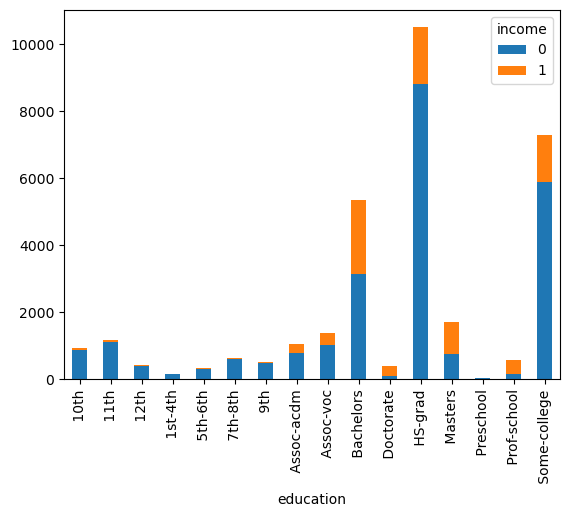

In [26]:
education_income = df.groupby('education')['income'].value_counts().unstack()
education_income.plot(kind='bar', stacked=True)


# Observations:

## 3)Analysis of Average Income by Education Level and Gender :

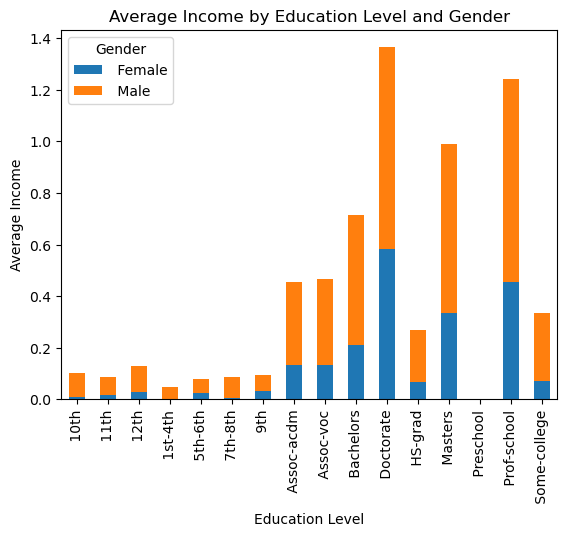

In [27]:
income_by_education_gender = df.groupby(['education', 'sex'])['income'].mean().unstack()
income_by_education_gender.plot(kind='bar', stacked=True)
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.title('Average Income by Education Level and Gender')
plt.legend(title='Gender')
plt.show()

## Analysis of Average Income by Education Level and Gender:


###  The bar plot above displays the average income based on education level and gender. Each bar in the plot represents the average income for a specific education level, and the bars are further stacked to differentiate between genders.

# Observations:

- The average income tends to increase with higher education levels for both males and females.

- In general, males tend to have higher average incomes compared to females across all education levels.

- The gender income gap appears to decrease with higher education, as the differences in average income between males and females become less pronounced in higher education categories.

- For some specific education levels (e.g., Doctorate and Prof-school), the average income for females is noticeably higher than for males.

## 4)How does the marital status relate to the hours worked per week?

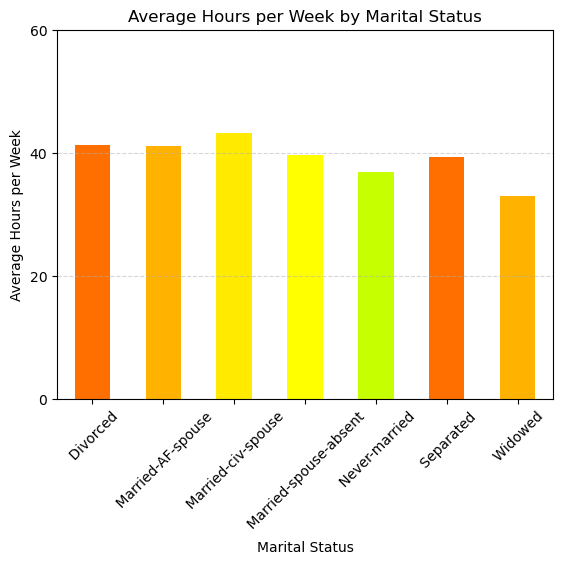

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

marital_hours = df.groupby('marital-status')['hours-per-week'].mean()
marital_hours.plot(kind='bar', color=['#FF6F00', '#FFB300', '#FFEA00', '#FFFF00', '#C6FF00'])

plt.xlabel('Marital Status')
plt.ylabel('Average Hours per Week')
plt.title('Average Hours per Week by Marital Status')

plt.xticks(rotation=45)
plt.yticks([0, 20, 40, 60])

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

# Analysis of Average Weekly Working Hours by Marital Status

### The horizontal bar plot above visualizes the average weekly working hours based on marital status. Each bar represents a specific marital status category, and the colors are used to distinguish between the bars.

# Observations:

- The "Married-civ-spouse" category has the highest average weekly working hours among all marital statuses.

- The "Divorced" and "Never-married" categories have relatively lower average working hours.

- Other marital status categories, such as "Separated," "Widowed," and "Married-spouse-absent," exhibit varying levels of average weekly working hours.

## 5)Is there a relationship between occupation and capital gain?

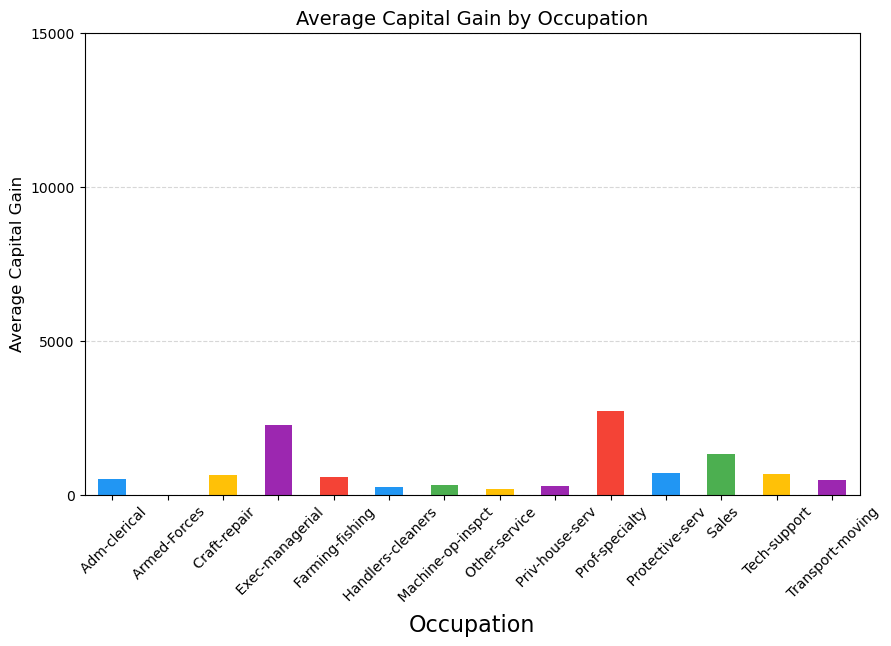

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Increase the size of the plot

occupation_capital_gain = df.groupby('occupation')['capital-gain'].mean()
occupation_capital_gain.plot(kind='bar', color=['#2196F3', '#4CAF50', '#FFC107', '#9C27B0', '#F44336'])

plt.xlabel('Occupation', fontsize=16)  # Increase font size for x-axis label
plt.ylabel('Average Capital Gain', fontsize=12)  # Increase font size for y-axis label
plt.title('Average Capital Gain by Occupation', fontsize=14)  # Increase font size for title

plt.xticks(rotation=45, fontsize=10)  # Increase font size and rotate x-axis labels
plt.yticks([0, 5000, 10000, 15000], fontsize=10)  # Increase font size for y-axis tick labels

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

# Analysis of Average Capital Gain by Occupation :

### The bar plot above illustrates the average capital gain based on different occupations. Each bar corresponds to a specific occupation, and the height of the bars represents the average capital gain associated with each occupation.

# Observations:

- The occupations of "Exec-managerial" and "Prof-specialty" show the highest average capital gains among all occupations.
- "Tech-support", "Sales" , and  "Craft-repair"  occupations also exhibit relatively higher average capital gains.
- "Armed-forces", "machine-op-inspct"  , "Farming-fishing" , "Handlers-cleaners", and "Priv-house-serv" occupations have lower average capital gains.

## 6)How does capital loss vary across different levels of education?

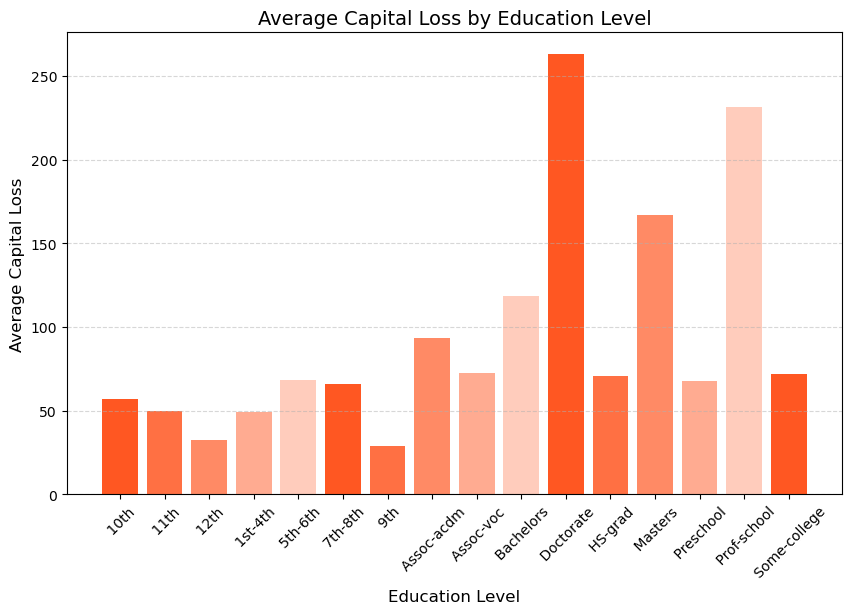

In [31]:
education_capital_loss = df.groupby('education')['capital-loss'].mean()

plt.figure(figsize=(10, 6))
colors = ['#FF5722', '#FF7043', '#FF8A65', '#FFAB91', '#FFCCBC'] # Different colors for each bar
plt.bar(education_capital_loss.index, education_capital_loss, color=colors)

plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Average Capital Loss', fontsize=12)
plt.title('Average Capital Loss by Education Level', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

# Analysis of Average Capital Loss by Education Level

###  The bar plot above illustrates the average capital loss based on different education levels. Each bar corresponds to a specific education level, and the height of the bars represents the average capital loss associated with each level.

# Observations:

- Individuals with higher education levels, such as "Doctorate" and "Prof-school," tend to have relatively higher average capital losses compared to other education levels.

- "Masters," "Bachelors," and "Some-college" education levels also show noticeable average capital losses.

- Education levels such as "Preschool," "1st-4th," and "5th-6th" exhibit lower average capital losses.

#  bivariate analysis for feature selection:

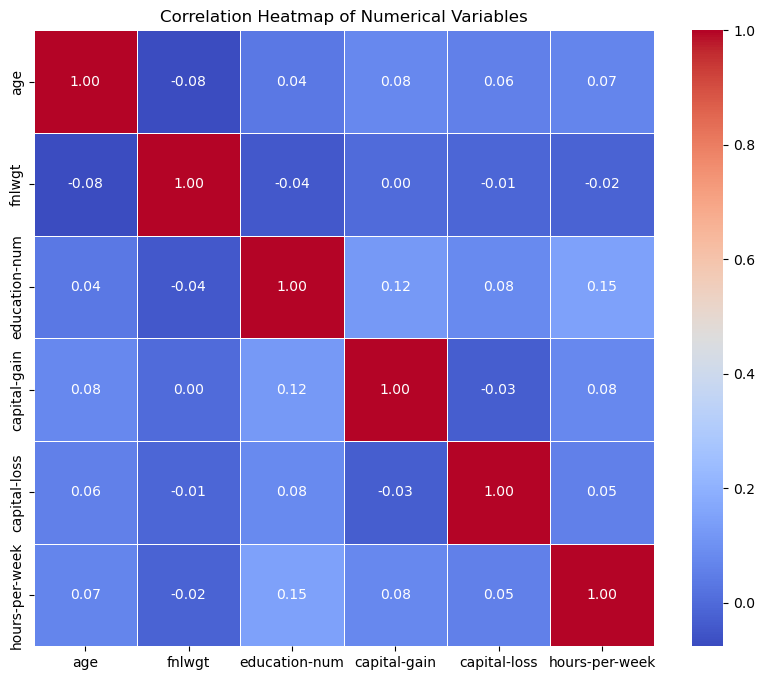

Variable: workclass
Chi-square statistic: 826.4382016805831
p-value: 3.6536633885266347e-174
There is a significant relation between workclass and income.

Variable: education
Chi-square statistic: 4428.404687554787
p-value: 0.0
There is a significant relation between education and income.

Variable: marital-status
Chi-square statistic: 6510.332126761207
p-value: 0.0
There is a significant relation between marital-status and income.

Variable: occupation
Chi-square statistic: 3742.8277065488646
p-value: 0.0
There is a significant relation between occupation and income.

Variable: relationship
Chi-square statistic: 6692.09880313626
p-value: 0.0
There is a significant relation between relationship and income.

Variable: race
Chi-square statistic: 330.94339926366814
p-value: 2.2797874171824478e-70
There is a significant relation between race and income.

Variable: sex
Chi-square statistic: 1516.5397108545465
p-value: 0.0
There is a significant relation between sex and income.

Variable: n

In [33]:
from scipy.stats import chi2_contingency
# Compute correlation matrix for numerical variables
correlation_matrix = df[numerical_variables].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# Perform chi-square test for categorical variables
for variable in categorical_variables:
    contingency_table = pd.crosstab(df[variable], df["income"])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print("Variable:", variable)
    print("Chi-square statistic:", chi2)
    print("p-value:", p)

    # Check the relation between income and variable based on p-value
    if p < 0.05:
        print("There is a significant relation between", variable, "and income.")
    else:
        print("There is no significant relation between", variable, "and income.")

    print()
    print("="*100)